# Explorary Data Analysis

In this part of project, we focus on the exploration of data in terms of its features, values distrubution, missing values ...

In the end we plan to obtain the overview of the dataset to understand which ML arhitectures and techiques can be applied to solve the given business problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('../data/raw/train.csv')
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**The data set contains:**
1) 3 text features
2) 1 target column with values [0,1] 

We can see that we have one unessasary feature id, lets drop it.

In [4]:
df = df.drop('id', axis=1)

In [5]:
df.shape

(7613, 4)

### Cleaning missing values

In [6]:
df.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
df[df.keyword.isna()]

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
# lets fill the missing values with 'no_keyword' and 'underfined' for location
df.keyword = df.keyword.fillna('no_keyword')
df.location = df.location.fillna('undefined')
df.isna().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

We need to clean up the location column from special characters and symbols

In [17]:
for item in df['location'].unique():
    print(item)

undefined
Birmingham
Est. September 2012 - Bristol
AFRICA
Philadelphia, PA
London, UK
Pretoria
World Wide!!
Paranaque City
Live On Webcam
milky way
GREENSBORO,NORTH CAROLINA
England.
Sheffield Township, Ohio
India
Barbados
Anaheim
Abuja
USA
South Africa
Sao Paulo, Brazil
hollywoodland 
Edmonton, Alberta - Treaty 6
Inang Pamantasan
Twitter Lockout in progress
Concord, CA
Calgary, AB
San Francisco
CLVLND
Nashville, TN
Santa Clara, CA
UK
St. Louis, MO
Walker County, Alabama
Australia
North Carolina
Norf Carolina
San Mateo County, CA
Njoro, Kenya
Your Sister's Bedroom
Arlington, TX
South Bloomfield, OH
New Hanover County, NC
Maldives
Manchester, NH
Wilmington, NC
global
Alberta | Sask. | Montana
Charlotte
Baton Rouge, LA
Hagerstown, MD
Gloucestershire , UK
Nairobi, Kenya
Instagram - @heyimginog 
304
Switzerland
US
Somewhere Only We Know ?
Belgium
dope show
Oshawa, Canada
Baker City Oregon
United States
marysville ca 
Hermosa Beach, CA
19.600858, -99.047821
Pennsylvania
Salt Lake City, Utah

We should clean the keyword column from %20 and replace it with '-'

In [22]:
for item in df['keyword'].unique():
    print(item)

no_keyword
ablaze
accident
aftershock
airplane%20accident
ambulance
annihilated
annihilation
apocalypse
armageddon
army
arson
arsonist
attack
attacked
avalanche
battle
bioterror
bioterrorism
blaze
blazing
bleeding
blew%20up
blight
blizzard
blood
bloody
blown%20up
body%20bag
body%20bagging
body%20bags
bomb
bombed
bombing
bridge%20collapse
buildings%20burning
buildings%20on%20fire
burned
burning
burning%20buildings
bush%20fires
casualties
casualty
catastrophe
catastrophic
chemical%20emergency
cliff%20fall
collapse
collapsed
collide
collided
collision
crash
crashed
crush
crushed
curfew
cyclone
damage
danger
dead
death
deaths
debris
deluge
deluged
demolish
demolished
demolition
derail
derailed
derailment
desolate
desolation
destroy
destroyed
destruction
detonate
detonation
devastated
devastation
disaster
displaced
drought
drown
drowned
drowning
dust%20storm
earthquake
electrocute
electrocuted
emergency
emergency%20plan
emergency%20services
engulfed
epicentre
evacuate
evacuated
evacuation
e

### Target exploration

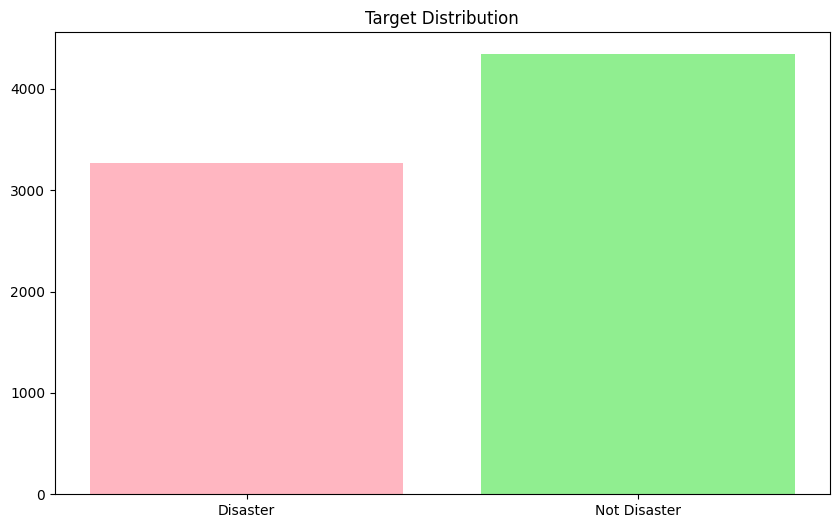

In [9]:
rel_disaster = df[df.target == 1].shape[0]
not_disaster = df[df.target == 0].shape[0]

figure = plt.figure(figsize=(10, 6))
plt.bar(['Disaster', 'Not Disaster'], [rel_disaster, not_disaster], color=['#FFB6C1', '#90EE90'])
plt.title('Target Distribution')
plt.show()

### Feature exploration

In [10]:
print(f"Number of unique values for location column: {len(df['location'].unique())}")
print(f"Number of unique values for keyword column: {len(df['keyword'].unique())}")

Number of unique values for location column: 3342
Number of unique values for keyword column: 222


For keyword column we can apply the hashing technique

In [11]:
df['text_length'] = df.text.apply(lambda x: len(x))

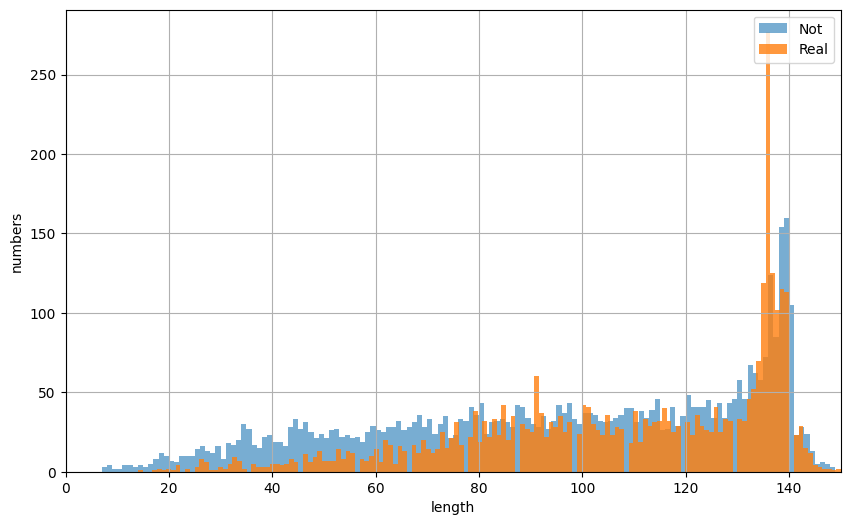

In [12]:
figure = plt.figure(figsize=(10, 6))
bins = 150
plt.hist(df[df['target'] == 0]['text_length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(df[df['target'] == 1]['text_length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

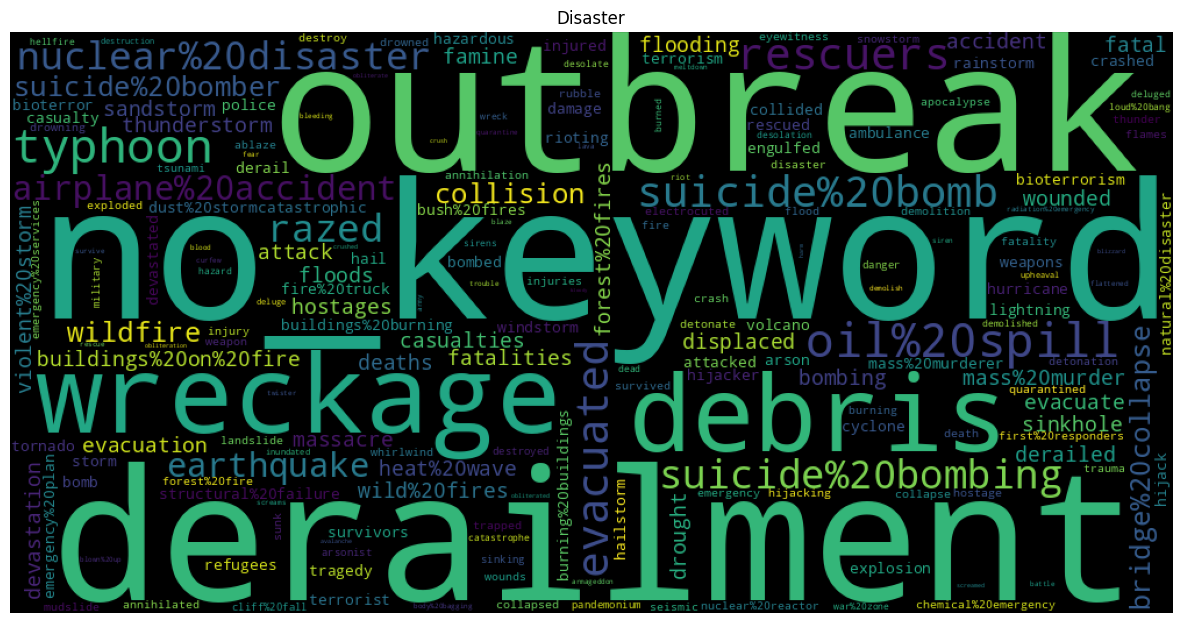

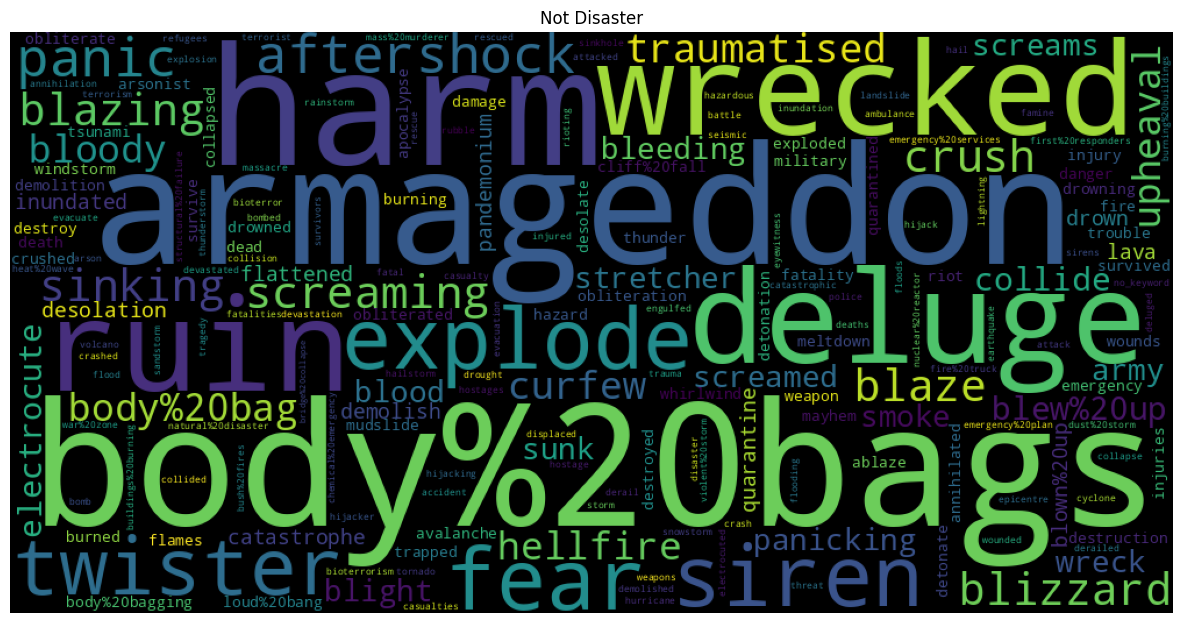

In [20]:
# word cloud throw keywords for disaster tweets and not disaster tweets
from wordcloud import WordCloud
dict_disaster = {}
dict_not_disaster = {}

for index, row in df.iterrows():
    if row['target'] == 1:
        for word in row['keyword'].split():
            if word in dict_disaster:
                dict_disaster[word] += 1
            else:
                dict_disaster[word] = 1
    else:
        for word in row['keyword'].split():
            if word in dict_not_disaster:
                dict_not_disaster[word] += 1
            else:
                dict_not_disaster[word] = 1
                
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dict_disaster)
plt.figure(figsize=(15,8))
plt.title('Disaster')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dict_not_disaster)
plt.figure(figsize=(15,8))
plt.title('Not Disaster')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

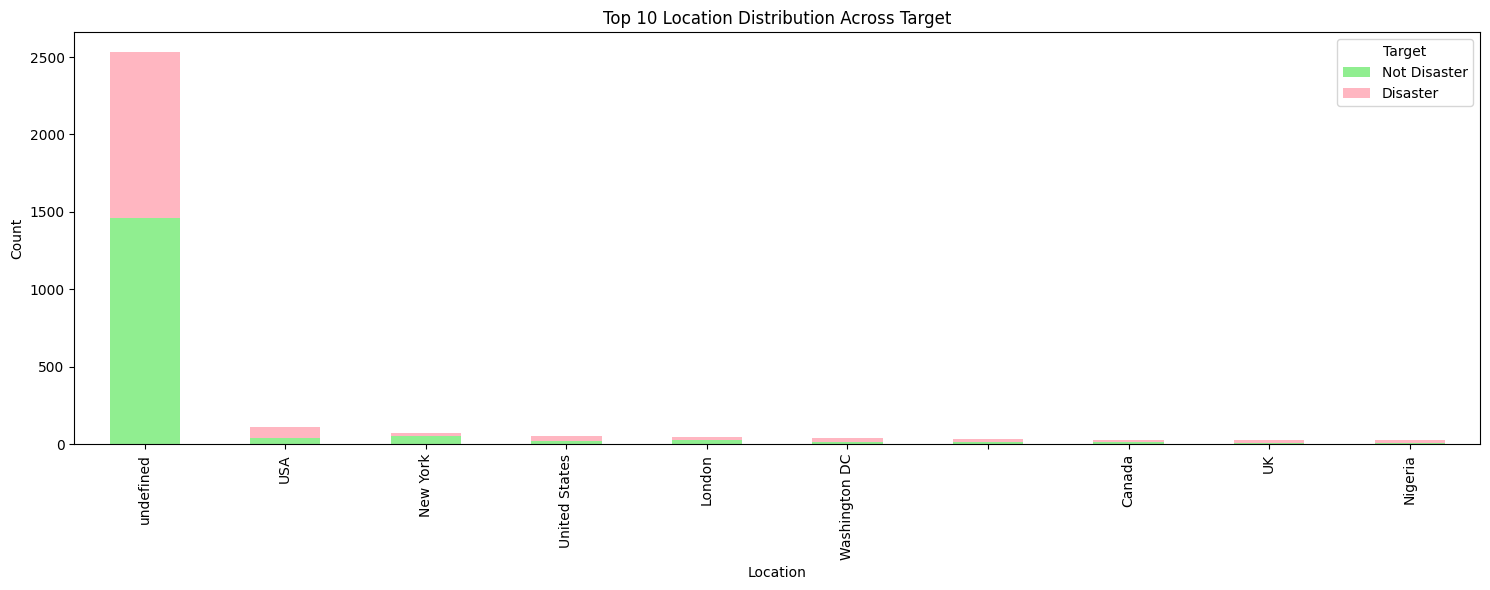

In [25]:
import matplotlib.pyplot as plt

# Clean the location column by removing special characters
df['location'] = df['location'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

location_distribution = df.groupby(['location', 'target']).size().unstack(fill_value=0)
location_distribution['total'] = location_distribution.sum(axis=1)

top_10_locations = location_distribution.sort_values(by='total', ascending=False).head(10)
top_10_locations = top_10_locations.drop(columns='total')

# Plot the location distribution across target for the top 10 locations
top_10_locations.plot(kind='bar', stacked=True, figsize=(15, 6), color=['#90EE90', '#FFB6C1'])
plt.title('Top 10 Location Distribution Across Target')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.tight_layout()
plt.show()

# EDA report

Our dataset represents the info regarding tweets with `['location','keyword']` fetures and `target variables in [0,1]`, where `0` means that no real disaster, `1` real disaster respectively.

1) The size of trainset is 7613 rows. It is good start for exploring the problem of text analysis and disaster predictions.
2) Dataset contains three unclear text features `['location','keyword','text']`.
3) Missing values for `keyword` is 61 and `location` is 2533. Number of unique values for location column: 3342 and number of unique values for keyword column: 222. 
4) Features `['location','keyword','text']` contains a lot of special characters, urls, tags and so on -> we need to apply different NLP techniques to clean data and prepare it for traninig.
5) The target distribution in trainset quite balanced.
6) According to the section of features exploration (worldclouds) we can see that we have some patterns in `keyword` that hightlights the difference between disasters and not disasters tweets. 
7) Location distribution across the `target` very bad, because the big part of it related to undentified region. -> we plan to drop this features due to amount of missing values + the presence of little meaning in the prediction process.